In [1]:
import numpy as np
import pandas as pd

## 合并数据集

### merge：类似数据库那样的连接

In [2]:
df1 = pd.DataFrame({'key':['b','b','a','c','a','a','b'],
               'data1': range(7)})
df2 = pd.DataFrame({'key':['a','b','d'],
                  'data2':range(3)})

In [3]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [4]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [5]:
# merge:默认根据相同的列key进行连接
# merge默认进行的是内连接，即只保留共同的key
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [6]:
# 显式指定根据那一列进行连接
pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [7]:
# 分别指定左右两个用于连接的列
df3 = pd.DataFrame({'lkey':['b','b','a','c','a','a','b'],
               'data1': range(7)})
df4 = pd.DataFrame({'rkey':['a','b','d'],
                  'data2':range(3)})
# left_on   rignt_on
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [8]:
# 通过how指定其他连接方式：left、right、outer、inner
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [9]:
# 可根据多个键进行合并
df5 = pd.DataFrame({'key1':['foo','foo','bar'],
                   'key2':['one','two','one'],
                   'lval':[1, 2, 3]})
df6 = pd.DataFrame({'key1':['foo','foo','bar','bar'],
                   'key2':['one','one','one','two'],
                   'rval':[4, 5, 6, 7]})

In [10]:
df5

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [11]:
df6

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [13]:
pd.merge(df5, df6, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [14]:
# suffixes：重复列名的处理
# 当左右两个df有重名的列（不是key），合并后会自动在重名后追加_x, _y，可手工指定后缀
pd.merge(df5, df6, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### 索引上的合并

In [15]:
# 可以将索引作为连接的key
df7 = pd.DataFrame({'key':['a','b','a','a','b','c'],
                   'value':range(6)})
df8 = pd.DataFrame({'group_val':[3.5, 7]}, index=['a','b'])

In [16]:
df7

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [17]:
df8

,group_val
a,3.5
b,7.0


In [19]:
# left_index  right_index 设置为True表示将索引作为连接的key
pd.merge(df7, df8, left_on='key', right_index=True)
# 如果两边都为True，则表示两边都是将索引作为key进行连接

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [20]:
# 使用DataFrame的join方法，也可以实现按索引合并
df9 = pd.DataFrame([[1,2],[3,4],[5,6,]], index=['a','c','e'],
                  columns=['Ohio','Nevada'])
df10 = pd.DataFrame([[7,8],[9,10],[11,12],[13,14]],
                   index=['b','c','d','e'], columns=['Missouri','Alabama'])

In [21]:
df9

,Ohio,Nevada
a,1,2
c,3,4
e,5,6


In [22]:
df10

,Missouri,Alabama
b,7,8
c,9,10
d,11,12
e,13,14


In [23]:
df9.join(df10, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [24]:
# join也支持on指定连接键
# 可传入一个DataFrame的列表，实现多个DataFrame的连接。
# 注意，join默认实现的是【左连接】，需手动指定其他方式。
df9.join(df10)

,Ohio,Nevada,Missouri,Alabama
a,1,2,NaN,NaN
c,3,4,9.0,10.0
e,5,6,13.0,14.0


### concat: 轴向连接

In [27]:
# numpy中的concatenate方法
arr1 = np.arange(12).reshape((3,4))
arr1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [29]:
np.concatenate([arr1,arr1,arr1], axis=1) #在1轴上连接，即列连接

array([[ 0,  1,  2,  3,  0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11,  8,  9, 10, 11]])

In [30]:
np.concatenate([arr1,arr1,arr1]) #默认在0轴连接，即行连接

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [31]:
# pandas的concat方法
s1 = pd.Series([0,1], index=['a','b'])
s2 = pd.Series([2,3,4], index=['a','d','e'])
s3 = pd.Series([5,6], index=['f','g'])

In [11]:
# concat可以接在一起，默认在axis=0，结果是一个新的series
pd.concat([s1,s2,s3])
# 可以出现重复的索引

a    0
b    1
a    2
d    3
e    4
f    5
g    6
dtype: int64

In [12]:
# 参数ignore_index默认False，如果为True，则忽略掉连接轴上原来的索引，重新进行索引编号。
pd.concat([s1,s2,s3], ignore_index=True)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
dtype: int64

In [33]:
# axis=1，则生成了dataframe
pd.concat([s1,s2,s3], axis=1)
# 索引没有重复，相同索引的被连接到一起，是外连接的形式

,0,1,2
a,0.0,2.0,NaN
b,1.0,NaN,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [36]:
# 参数join 显式指定使用内连接
s4 = pd.concat([s1*5, s3])
s4

a    0
b    5
f    5
g    6
dtype: int64

In [38]:
pd.concat([s1,s4], axis=1, join='inner')

,0,1
a,0,0
b,1,5


In [41]:
# 参数join_axes指定要在非连接轴上使用哪些索引
pd.concat([s1,s4], axis=1, join_axes=[['a','c','b','e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


In [2]:
s1 = pd.Series([0,1], index=['a','b'])
s2 = pd.Series([2,3,4], index=['a','d','e'])
s3 = pd.Series([5,6], index=['f','g'])

In [3]:
# 参数keys可以指定一种层次化索引，这样在连接的结果中可以清楚看到哪些数据来自原来的哪个组
# 沿着0轴，则keys作为二级索引
pd.concat([s1,s2,s3], keys=['one','two','three'])

one    a    0
       b    1
two    a    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [6]:
# 沿着1轴，则keys作为列名
pd.concat([s1,s2,s3], keys=['one','two','three'],  axis=1)

,one,two,three
a,0.0,2.0,NaN
b,1.0,NaN,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [7]:
# dataframe也是如此，keys可指定二级索引
df11 = pd.DataFrame(np.arange(6).reshape(3,2), index=['a','b','c'], columns=['one','two'])
df12 = pd.DataFrame(5 + np.arange(4).reshape(2,2), index=['a','c'], columns=['three','four'])

In [8]:
df11

,one,two
a,0,1
b,2,3
c,4,5


In [9]:
df12

,three,four
a,5,6
c,7,8


In [10]:
pd.concat([df11,df12], axis=1, keys=['level1','level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

### combine_first：合并、补缺
例如，现有两个同样大的数据集，想用b中对应位置的值填补a中的空白。

In [21]:
# numpy的where来实现
a =  pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f','e','d','c','b','a'])
b =  pd.Series(np.arange(len(a))*1.0,
              index=['f','e','d','c','b','a'])
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [22]:
b[-1] = np.nan
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [23]:
np.where(pd.isnull(a), b, a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [27]:
# pandas的conbime-first方法也可以
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [30]:
b[3] = np.nan
b[:-2]

f    0.0
e    1.0
d    2.0
c    NaN
dtype: float64

In [31]:
a[2:]

d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [32]:
b[:-2].combine_first(a[2:])
# 以上演示说明combine_first是指，b com a的话，就是用a中信息填补b中缺失的。根据索引进行匹配。如果b中不缺，则不会填补。

a    NaN
b    4.5
c    3.5
d    2.0
e    1.0
f    0.0
dtype: float64



## 重塑和轴向旋转

### 重塑层次化索引 stack/unstack

In [36]:
data21 = pd.DataFrame(np.arange(6).reshape((2,3)),
                  index=pd.Index(['Ohio','Colorado'],name='state'),
                  columns=pd.Index(['one','two','three'], name='number'))
data21

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [37]:
# stack方法，可以讲列转换为行，即压缩了维度
data21.stack()

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [38]:
# unstack可以将其恢复为df
data21.stack().unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [41]:
# 默认都是操作在最内层。传入编号或名称，可以指定对哪层进行操作，即，将哪层变为列
data21.stack().unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


### pivot
对于  日期 商品 销量 这样的数据库数据，更希望通过 每行是日期 每列是商品 中间是销量 这样的表格形式更直观地处理，pivot就是提供了这种功能。

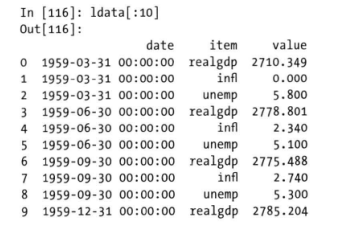

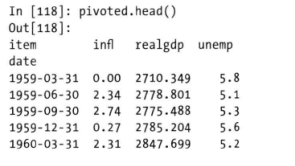

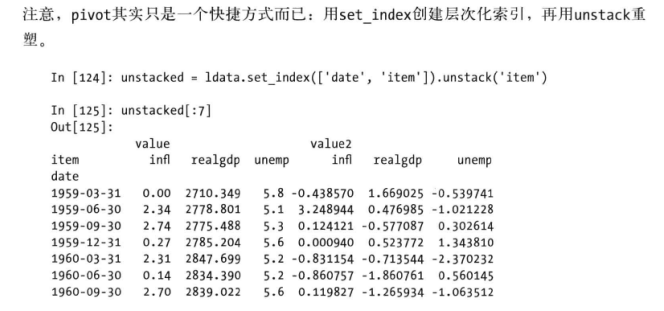

## 数据转换
### 去重: drop_duplicates

In [42]:
# duplicated 是否重复
df22 = pd.DataFrame({'k1':['one']*3 + ['two']*4,
                    'k2':[1,1,2,3,3,4,4]})
df22

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [43]:
df22.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [44]:
# drop_duplicates 移除了多余的重复行，也就是说总的种类不变，多余的删除
df22.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [45]:
# 以上两个方法可加参数，指定根据那些列判断重复
df22.drop_duplicates(['k1']) # 只根据k1列的值判断是否重复

,k1,k2
0,one,1
3,two,3


### 映射:map

In [46]:
# 原始数据为食物+重量，现有映射关系为食物+种类，为原始数据各行添加一列叫做种类
df23 = pd.DataFrame({'food':['Bacon','pork','Beef','tomato'],
                    'ounces':[3,5,2,1]})
df23

,food,ounces
0,bacon,3
1,pork,5
2,beef,2
3,tomato,1


In [48]:
category = {
    'bacon':'meat',
    'pork':'meat',
    'beef':'meat',
    'tomato':'vegetable'
}
# map方法 进行映射
# 先进行一次小写转换
df23['category'] = df23['food'].map(str.lower).map(category)
df23

,food,ounces,category
0,bacon,3,meat
1,pork,5,meat
2,beef,2,meat
3,tomato,1,vegetable


In [50]:
# 也可以给map传入一个lambda表达式，一步完成校验和映射
df23['category2'] = df23['food'].map(lambda x: category[x.lower()])
df23

,food,ounces,category,category2
0,bacon,3,meat,meat
1,pork,5,meat,meat
2,beef,2,meat,meat
3,tomato,1,vegetable,vegetable


### 替换值：replace

In [51]:
se23 = pd.Series([1,-999,2,-999,-1000,3])
se23

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: int64

In [52]:
se23.replace(-999, np.nan) #replace 替换

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [53]:
se23.replace([-999.-1000], np.nan) # 可替换多个

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: int64

In [55]:
se23.replace([-999, -1000], [np.nan, 0]) 
#可以更精细地一次多个替换，这里就是将-999->np.nan, -1000->0

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [56]:
# 也可以传入一个字典，更加清晰易懂
se23.replace({-999:np.nan, -1000:1000})

0       1.0
1       NaN
2       2.0
3       NaN
4    1000.0
5       3.0
dtype: float64

### 对轴标签的重命名：map/rename

In [58]:
# map
df24 = pd.DataFrame(np.arange(12).reshape((3,4)),
                   index=['Ohio','Colorado','NewYork'],
                   columns=['one','two','three','four'])
df24

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
NewYork,8,9,10,11


In [60]:
# 通过map方法，变为大写
df24.index = df24.index.map(str.upper)
df24

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEWYORK,8,9,10,11


In [62]:
# rename方式可以创建新的改名后的对象，而不改变原来的
df24.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
Newyork,8,9,10,11


In [64]:
# rename也支持字典型修改
df24.rename(index={'OHIO':'Indiana'},
           columns={'three':'peeklaboo'})

,one,two,peeklaboo,four
Indiana,0,1,2,3
COLORADO,4,5,6,7
NEWYORK,8,9,10,11


In [65]:
# rename的inplace参数设置为True则是就地修改
df24.rename(index={'OHIO':'aaaa'},
           columns={'three':'bbbb'}, inplace=True)
df24

,one,two,bbbb,four
aaaa,0,1,2,3
COLORADO,4,5,6,7
NEWYORK,8,9,10,11


### cut：离散化、切分

In [66]:
# 例如，有一组年龄，想要切分成年龄组
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
# 切分分界点
bins = [18, 25, 35, 60, 100]
# cut 方法
cats = pd.cut(ages, bins)

In [67]:
cats # 生成一个categorial类型的对象。可以看到，是(]型
# 在cut中传入right=False则会按照[)型进行处理

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [68]:
cats.labels

/home/anthony/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  """Entry point for launching an IPython kernel.


array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [69]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [71]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [72]:
pd.value_counts(cats) #各分组的数量

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [73]:
# 参数labels 可设置自己的分组名称
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [76]:
# cut方法如果不传入分界点，而是传入一个数字表示分成几组，则会自动根据max、min的区间等长划分
data25 = np.random.rand(20)
pd.cut(data25, 4, precision=3) #精度表示划分区间精确到小数点后面几位

[(0.5, 0.733], (0.5, 0.733], (0.733, 0.967], (0.5, 0.733], (0.0316, 0.266], ..., (0.733, 0.967], (0.266, 0.5], (0.0316, 0.266], (0.0316, 0.266], (0.733, 0.967]]
Length: 20
Categories (4, interval[float64]): [(0.0316, 0.266] < (0.266, 0.5] < (0.5, 0.733] < (0.733, 0.967]]

In [77]:
# cut是根据值范围切成几块
# qcut会根据样本分布，根据分位数切成几块，每一块中含有基本同样多的数据
data26 = np.random.randn(1000)
cats26 = pd.qcut(data26, 4) # 按四分位数划分
cats26

[(-0.654, -0.0104], (-0.0104, 0.655], (0.655, 3.213], (-0.654, -0.0104], (-4.033, -0.654], ..., (-4.033, -0.654], (-4.033, -0.654], (-4.033, -0.654], (-4.033, -0.654], (-0.0104, 0.655]]
Length: 1000
Categories (4, interval[float64]): [(-4.033, -0.654] < (-0.654, -0.0104] < (-0.0104, 0.655] < (0.655, 3.213]]

In [79]:
pd.value_counts(cats26)

(0.655, 3.213]       250
(-0.0104, 0.655]     250
(-0.654, -0.0104]    250
(-4.033, -0.654]     250
dtype: int64

### 检测和过滤 离群点/异常值
没有特殊方法，就是运用基本的方法，进行一些数组运算

In [81]:
data27 = pd.DataFrame(np.random.randn(1000, 4))
data27.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.037298,0.033467,-0.001704,-0.004724
std,0.978660,1.026403,0.993022,0.977392
min,-3.015706,-3.118587,-2.828511,-3.435860
25%,-0.716296,-0.644989,-0.675474,-0.679752
50%,-0.019391,0.024175,0.030297,-0.027797
75%,0.615044,0.709158,0.676640,0.675070
max,3.187791,3.536447,2.897020,3.207445


In [82]:
# 假设认为abs大小超过3则为离群
data27[(np.abs(data27) > 3).any(1)] #any要指定为，对每一行来说，检查1轴上的any
# 只要行中有一个abs>3则被选出

,0,1,2,3
197,-0.432900,-0.278604,0.813148,-3.435860
233,-0.324293,3.137108,0.030540,-0.925124
288,3.187791,0.505790,1.064658,-0.551813
395,-0.139116,0.845411,1.519643,3.207445
408,-0.659011,-0.722217,-0.517873,3.200538
527,-1.221308,3.536447,-2.004873,0.729033
583,-1.187624,-3.118587,-1.447646,0.954482
686,-3.015706,0.789595,-0.561058,1.319715


In [92]:
(np.abs(data27)>3 ).any()# any方法默认检查0轴，对每一列，只要该列的所有行中存在任何一个true，则该列结果为true

0     True
1     True
2    False
3     True
dtype: bool

In [95]:
(np.abs(data27)>3 ).any(1)# any方法指定检查1轴，对每一行，只要该行的所有列中有一个为true则该行结果为true

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

### 排列与随机采样

In [97]:
# numpy中的permutation可以产生随机序列
sampler = np.random.permutation(5)
sampler

array([3, 4, 1, 2, 0])

In [98]:
# 将随机序列传入，即可进行随机重排或采样
df28 = pd.DataFrame(np.arange(20).reshape(5,4))
df28

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [100]:
# 随机重排或采样
df28.take(sampler) #即按照34120的顺序重排了各行

,0,1,2,3
3,12,13,14,15
4,16,17,18,19
1,4,5,6,7
2,8,9,10,11
0,0,1,2,3


### 计算指标/哑变量
pd.get_dummies
此部分参见书页码214.



## 字符串操作

### 字符串对象方法

python内置的字符串处理方法，可以实现很多基本的操作。
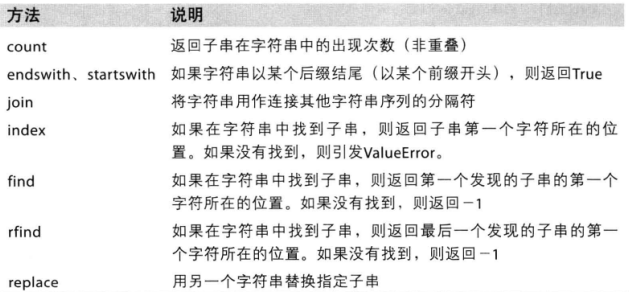

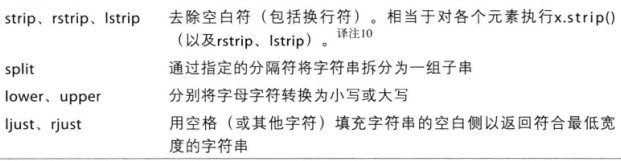

### 正则表达式
不赘述，详见书页码219

### pandas中矢量化的字符串函数
也就是说，直接在一个向量（series/dataframe上进行操作）

In [101]:
data29 = {'Dave':'dave@google.com', 'Steve':'steve@gmail.com',
         'Rob':'rob@gmail.com', 'Wes':np.nan}
data29 = pd.Series(data29)
data29

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [103]:
data29.isnull()

Dave     False
Rob      False
Steve    False
Wes       True
dtype: bool

In [104]:
# se对象有一个str属性，通过str属性可访问这些字符串操作方法
# contains
data29.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [105]:
# 也支持正则表达式
import re
pattern = '([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'
data29.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

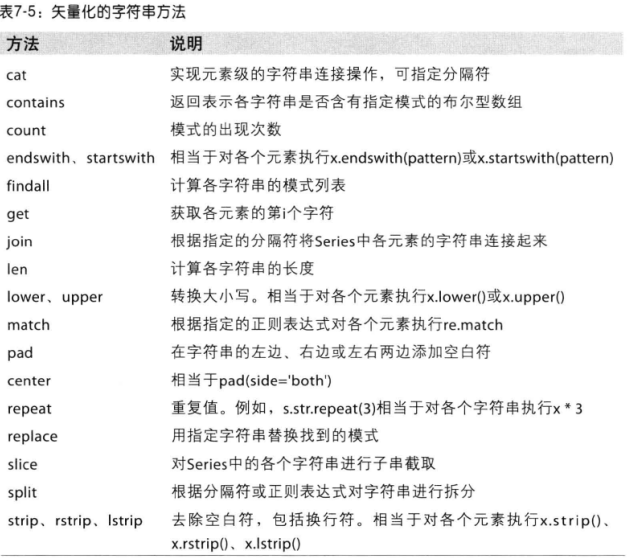